In [208]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Задания для самостоятельного решения

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

Объем выборки можно расчитать с помощью формулы, найдем Z для 95 процентного интервала, возьмем корень из дисперсии
(стандартное отклонение)

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения

In [209]:
delta = 3
sigma = np.sqrt(225)
Z = 1.96

In [210]:
N = int(np.ceil(((Z * sigma) / delta) ** 2))
N

97

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [211]:
ci_lower, ci_upper = st.norm.interval(alpha=0.98,loc=130, scale=15)
print(f'Разница между правым и левым концом - {int(ci_upper - ci_lower)}')

Разница между правым и левым концом - 69


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально</div>

In [212]:
np.random.seed(42)

male_height_sample  = st.norm.rvs(loc=171, scale=100, size=150000)  
female_height_sample = st.norm.rvs(loc=170, scale=100, size=150000)

In [213]:
stat, p = st.ttest_ind(male_height_sample, female_height_sample)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")

Статистика = 3.66358, p = 0.00025


In [214]:
"""
H0 - Выборки не отличаются
H1 - Выборки отличаются
"""
if p > 0.001:
    print('Выборки не отличаются')
else:
    print('Выборки отличаются')

Выборки отличаются


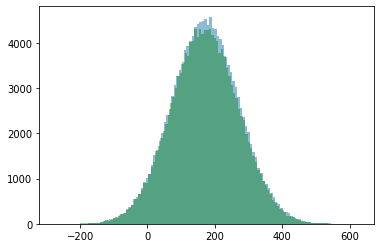

In [215]:
plt.hist(male_height_sample, bins=120, alpha=0.5);
plt.hist(female_height_sample, bins=120, alpha=0.4, color='green');

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения

In [71]:
delta = 50
Z = 1.96
sigma = 150

In [216]:
N = int(np.ceil((Z * sigma) / 2 ** 2))
N

8

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [217]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [218]:
oddsratio, pvalue = st.fisher_exact(observations)

In [220]:
print(f'Stat = {oddsratio:.5f}, p = {p:.5f}')

"""
H0 - Волшебник не умеет предсказывать погоду 
H1 - Волшебник умеет предсказывать погоду
"""
if pvalue > 0.05:
    print ( 'Не отклоняем нулевую гипотезу, волшебник не умеет предсказывать погоду ' )
else:
    print ( 'Отклоняем нулевую гипотезу, волшебник умеет предсказывать погоду')

Stat = 0.58120, p = 0.00025
Не отклоняем нулевую гипотезу, волшебник не умеет предсказывать погоду 


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [128]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), st.sem(data)
    h = se * st.t.ppf((1 + confidence) / 2, n - 1)
    return m - h, m + h

In [221]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [222]:
print(f'Доверительный интервал с уровнем доверия 90% - {mean_confidence_interval(data, confidence=.90)}')

Доверительный интервал с уровнем доверия 90% - (6.07363110319857, 7.183511753944288)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [223]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]

In [224]:
"""
H0 - выборки принадлежат одному множеству
H1 - выборки не принадлежат одному множеству
"""

stat, pvalue = st.ttest_ind(A, B)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if pvalue > 0.05:
    print(f'Не отклоняем нулевую гипотезу, выборки принадлежат одному множеству')
else:
    print(f'Отклоняем нулевую гипотезу, выборки не принадлежат одному множеству')

Статистика = 11.86523, p = 0.00025
Отклоняем нулевую гипотезу, выборки не принадлежат одному множеству


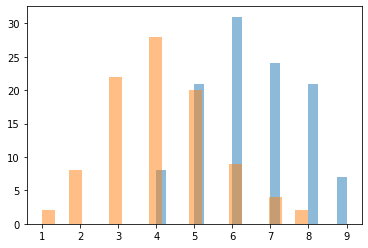

In [225]:
plt.hist(pd.DataFrame(A), bins=20, alpha=0.5);
plt.hist(pd.DataFrame(B), bins=20, alpha=0.5);

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

Вывод: мне кажется, то что нужно принят альтернативную гипотезу, уровень значимости 0.03 < 0.05, и плюсом нам надо не совсем нормальное расспределение.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [226]:
np.random.seed(11)
A = st.norm.rvs(scale=15, loc=169, size=300)
B = st.norm.rvs(scale=14, loc=171.4, size=300)

In [227]:
H0 = "различий нет препараты действуют одинаково"
H1 = "различия и препараты действуют по разному"

In [228]:
stat, pvalue = st.ttest_ind(A, B)

print(f'P-value: {pvalue}')
if pvalue > 0.05:
    print(f'Принимаем нулевую гипотезу о том, что: {H0}')
else:
    print(f'Принимаем альтернативную гипотезу о том, что: {H1}')

P-value: 0.051284593140469285
Принимаем нулевую гипотезу о том, что: различий нет препараты действуют одинаково


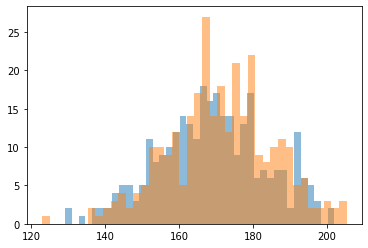

In [229]:
plt.hist(pd.DataFrame(A), bins=40, alpha=0.5);
plt.hist(pd.DataFrame(B), bins=40, alpha=0.5);

Выборки незначительно отличаются, можно попробовать сгенерировать еще несколько выборок, и тогда мы увидим, что в некоторых случаях мы можем отклонить нулевую гипотезу, но значение p-value становится не намного меньше 0.05, так что по-моему мнению различия являются чисто случайными.